In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iqra-dataset/Book2.xlsx
/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv
/kaggle/input/mri-scans-dataset/TOMM40_Extracted_Clean.csv
/kaggle/input/mri-scans-dataset/APOE_Filtered_Reordered.csv
/kaggle/input/mri-scans-dataset/Final_TOMM40_APOE_GRS.csv
/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI/128_S_0272/MPRAGE_Repeat/2006-10-12_16_38_49.0/128_S_0272_MPRAGE_Repeat_20061012161822_3.json
/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI/128_S_0272/MPRAGE_Repeat/2006-10-12_16_38_49.0/128_S_0272_MPRAGE_Repeat_20061012161822_3.nii
/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI/099_S_2205/MPRAGE_GRAPPA2/2011-06-16_10_40_13.0/099_S_2205_MPRAGE_GRAPPA2_20110616101503_3.nii
/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI/099_S_2205/MPRAGE_GRAPPA2/2011-06-16_10_40_13.0/099_S_2205_MPRAGE_GRAPPA2_20110616101503_3.json
/kaggle/input/mri-scans-dataset

<h3>Sample MRI scan</h3>

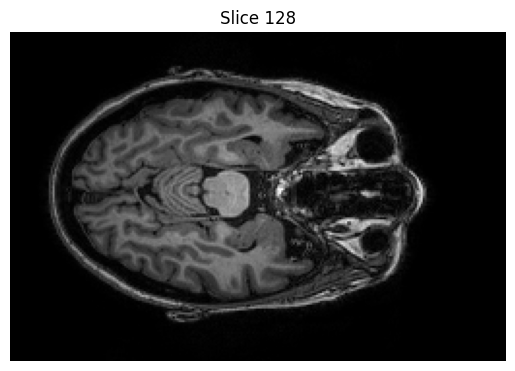

In [2]:
# Step 1: Install necessary libraries
!pip install nibabel matplotlib
 
# Step 2: Import the libraries
import nibabel as nib
import matplotlib.pyplot as plt
 
# Step 3: Load the NIfTI file
nii_file_path = '/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI/002_S_0413/MPRAGE_SENS/2006-05-19_16_17_47.0/002_S_0413_MPRAGE_SENSE_20060519161017_301.nii'  # Replace with the correct path to your .nii file
img = nib.load(nii_file_path)
 
# Step 4: Get the image data (this is a 3D array)
img_data = img.get_fdata()
 
# Step 5: Display the middle slice (you can change the index to show different slices)
slice_index = img_data.shape[2] // 2  # Middle slice
plt.imshow(img_data[:, :, slice_index], cmap='gray')
plt.title(f"Slice {slice_index}")
plt.axis('off')  # Turn off axis
plt.show() 

<h1>Training with Timeline</h1>

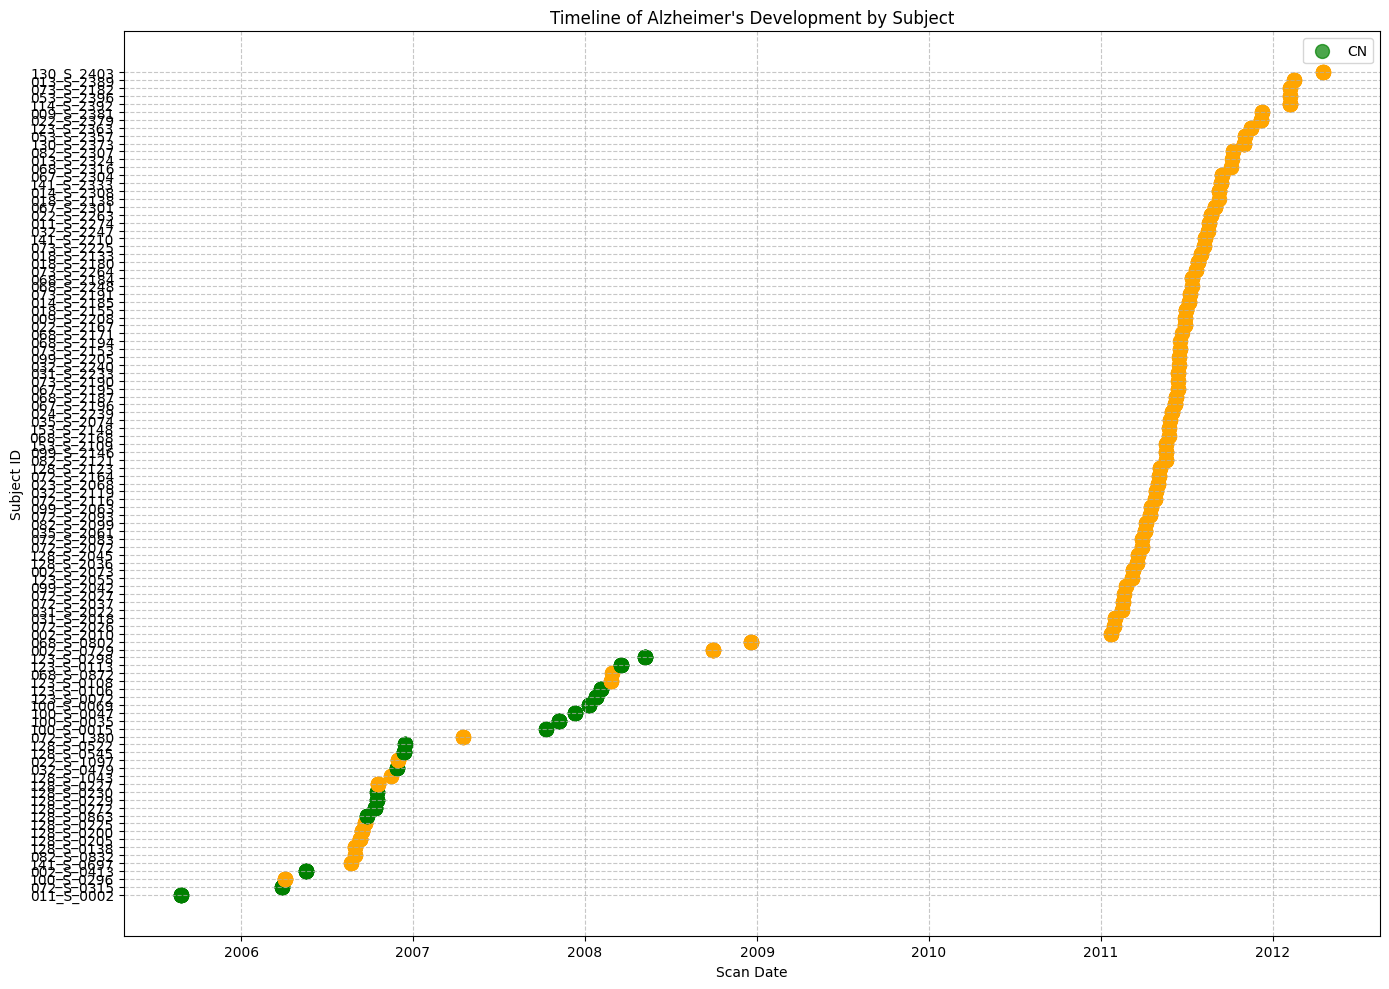

I0000 00:00:1747227569.345274      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747227569.346029      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Full dataset class distribution: {0: 291, 1: 921}
No AD samples found in the dataset. Proceeding with binary classification (CN vs. MCI).
X_mri_train shape: (969, 128, 128, 32, 1)
X_clinical_train shape: (969, 4)
y_train shape: (969,)
X_mri_test shape: (243, 128, 128, 32, 1)
X_clinical_test shape: (243, 4)
y_test shape: (243,)
Unique classes in y_test: [0 1]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 32,   │              0 │ -                      │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 128, 128, 32,   │              0 │ input_layer[0][0]      │
│ (TimeDistributed)         │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 32, 128, 128,   │              0 │ time_distributed[0][0] │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 32, 16, 16, 64) │          4,160 │ permute[0][0]          │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 32, 16384)      │              0 │ time_distributed_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 32, 16384)      │     33,572,352 │ reshape[0][0],         │
│ (MultiHeadAttention)      │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 32, 16384)      │         32,768 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32, 16384)      │              0 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32, 512)        │      8,389,120 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 32, 512)        │      1,050,624 │ dense[0][0],           │
│ (MultiHeadAttention)      │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 32, 512)        │          1,024 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 512)        │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32, 512)        │        262,656 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 512)            │              0 │ dense_1[0][0]          │
│ (GlobalAveragePooling

 Total params: 43,483,682 (165.88 MB)

 Trainable params: 43,483,682 (165.88 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


I0000 00:00:1747228127.018769     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


243/243 ━━━━━━━━━━━━━━━━━━━━ 127s 158ms/step - accuracy: 0.5751 - loss: 1.0367 - val_accuracy: 0.7819 - val_loss: 0.4438
Epoch 2/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.7017 - loss: 0.5209 - val_accuracy: 0.7819 - val_loss: 0.4110
Epoch 3/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.7409 - loss: 0.4721 - val_accuracy: 0.7860 - val_loss: 0.4052
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - accuracy: 0.7590 - loss: 0.4390 - val_accuracy: 0.8025 - val_loss: 0.4037
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.7670 - loss: 0.4548 - val_accuracy: 0.8025 - val_loss: 0.4099
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.7759 - loss: 0.4318 - val_accuracy: 0.7984 - val_loss: 0.4156
Epoch 7/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 138ms/step - accuracy: 0.7708 - loss: 0.4203 - val_accuracy: 0.8025 - val_loss: 0.4067
Epoch 8/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.7659 - loss: 0.4296 - va

In [4]:
# import numpy as np
# import pandas as pd
# import os
# import nibabel as nib
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras import layers, Model, callbacks
# from datetime import datetime
# from sklearn.utils.class_weight import compute_class_weight
# import gc
# import matplotlib.pyplot as plt

# # Enable mixed precision to reduce memory usage
# from tensorflow.keras.mixed_precision import set_global_policy
# set_global_policy('mixed_float16')

# # Set random seed for reproducibility
# tf.random.set_seed(42)
# np.random.seed(42)

# # Clear GPU memory
# tf.keras.backend.clear_session()
# gc.collect()

# # Base path for the dataset
# base_path = '/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI'

# # Collect all MRI files and their metadata
# mri_files = []
# subject_ids = []
# scan_dates = []

# for subject in os.listdir(base_path):
#     subject_path = os.path.join(base_path, subject)
#     if not os.path.isdir(subject_path):
#         continue
#     for scan_type in os.listdir(subject_path):
#         scan_type_path = os.path.join(subject_path, scan_type)
#         if not os.path.isdir(scan_type_path):
#             continue
#         for date_folder in os.listdir(scan_type_path):
#             date_path = os.path.join(scan_type_path, date_folder)
#             if not os.path.isdir(date_path):
#                 continue
#             for file in os.listdir(date_path):
#                 if file.endswith('.nii'):
#                     file_path = os.path.join(date_path, file)
#                     mri_files.append(file_path)
#                     subject_ids.append(subject)
#                     scan_dates.append(date_folder)

# # Convert dates to datetime for sorting
# scan_dates_dt = [datetime.strptime(date, '%Y-%m-%d_%H_%M_%S.0') for date in scan_dates]

# # Create a DataFrame to sort by date
# data_df = pd.DataFrame({
#     'file_path': mri_files,
#     'subject_id': subject_ids,
#     'scan_date': scan_dates_dt
# })
# data_df = data_df.sort_values(by='scan_date').reset_index(drop=True)

# # Visualize the timeline of MRI scans
# plt.figure(figsize=(12, 8))
# unique_subjects = data_df['subject_id'].unique()
# for idx, subject in enumerate(unique_subjects):
#     subject_data = data_df[data_df['subject_id'] == subject]
#     plt.scatter(subject_data['scan_date'], [idx] * len(subject_data), label=subject, s=50, alpha=0.6)
# plt.yticks(range(len(unique_subjects)), unique_subjects)
# plt.xlabel('Scan Date')
# plt.ylabel('Subject ID')
# plt.title('Timeline of MRI Scans by Subject')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.savefig('mri_timeline.png')  # Save the timeline as an image
# plt.show()  # Display the plot if running in an interactive environment

# # Load clinical data with specified dtypes to avoid DtypeWarning
# clinical_data = pd.read_csv('/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv', low_memory=False)
# clinical_data = clinical_data[clinical_data['PTID'].isin(subject_ids)]

# # Align clinical data with MRI files
# data_df = data_df.merge(clinical_data, left_on='subject_id', right_on='PTID', how='inner')

# # Handle missing values in clinical features
# clinical_features = data_df[['MMSE', 'ADAS11', 'ADAS13', 'AGE']].copy()
# clinical_features = clinical_features.fillna(clinical_features.mean())  # Fill missing values with mean

# # Load and preprocess MRI scans (3D to 2D slices with temporal framing)
# num_slices = 32  # Fixed number of slices for temporal dimension
# H, W = 128, 128  # Resize to a fixed 2D size

# mri_data_list = []
# for file in data_df['file_path']:
#     mri_scan = nib.load(file)
#     mri_data = mri_scan.get_fdata()  # Shape: (H_orig, W_orig, T)
    
#     # Resize the 2D slices to (H, W)
#     T = mri_data.shape[2]
#     mri_data_resized = np.zeros((H, W, T))
#     for t in range(T):
#         slice_2d = mri_data[:, :, t]
#         slice_2d = tf.image.resize(slice_2d[..., np.newaxis], (H, W)).numpy()[..., 0]
#         mri_data_resized[:, :, t] = slice_2d
    
#     # Normalize: Z-score normalization per scan
#     mri_data_resized = (mri_data_resized - np.mean(mri_data_resized)) / (np.std(mri_data_resized) + 1e-8)
    
#     # Adjust number of slices to num_slices
#     if T > num_slices:
#         indices = np.linspace(0, T-1, num_slices).astype(int)
#         mri_data_resized = mri_data_resized[:, :, indices]
#     elif T < num_slices:
#         pad_width = num_slices - T
#         mri_data_resized = np.pad(mri_data_resized, ((0, 0), (0, 0), (0, pad_width)), mode='constant')
    
#     mri_data_list.append(mri_data_resized)

# # Stack into a 5D array: (num_samples, H, W, T, 1)
# X_mri = np.stack(mri_data_list, axis=0)
# X_mri = np.expand_dims(X_mri, axis=-1)  # Add channel dimension: (num_samples, H, W, T, 1)

# # Standardize clinical features
# scaler = StandardScaler()
# X_clinical = scaler.fit_transform(clinical_features)

# # Target labels (CN = 0, MCI = 1, AD = 2)
# y = data_df['DX_bl'].map({'CN': 0, 'MCI': 1, 'LMCI': 1, 'SMC': 1, 'EMCI': 1, 'Dementia': 2, 'AD': 2}).values

# # Check full dataset class distribution
# unique, counts = np.unique(y, return_counts=True)
# class_distribution = dict(zip(unique, counts))
# print(f'Full dataset class distribution: {class_distribution}')

# # Handle missing AD class
# if 2 not in class_distribution or class_distribution.get(2, 0) == 0:
#     print("No AD samples found in the dataset. Proceeding with binary classification (CN vs. MCI).")
#     # Filter out any non-CN/MCI samples (though none should exist if AD is missing)
#     mask = y != 2
#     X_mri = X_mri[mask]
#     X_clinical = X_clinical[mask]
#     y = y[mask]
#     num_classes = 2  # Binary classification (CN vs. MCI)
# else:
#     num_classes = 3  # Continue with three-class classification
#     # Note: SMOTE commented out due to compatibility issue
#     # If AD is present but underrepresented, consider installing compatible versions:
#     # pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1
#     # Then uncomment the following block:
#     '''
#     if class_distribution.get(2, 0) < 50:
#         print("Oversampling AD class using SMOTE...")
#         from imblearn.over_sampling import SMOTE
#         X_mri_flat = X_mri.reshape(X_mri.shape[0], -1)
#         X_combined = np.hstack((X_mri_flat, X_clinical))
#         smote = SMOTE(random_state=42)
#         X_combined_resampled, y_resampled = smote.fit_resample(X_combined, y)
#         X_mri_resampled = X_combined_resampled[:, :-X_clinical.shape[1]].reshape(-1, H, W, num_slices, 1)
#         X_clinical_resampled = X_combined_resampled[:, -X_clinical.shape[1]:]
#         X_mri, X_clinical, y = X_mri_resampled, X_clinical_resampled, y_resampled
#         unique, counts = np.unique(y, return_counts=True)
#         print(f'Class distribution after oversampling: {dict(zip(unique, counts))}')
#     '''

# # Stratified train-test split
# X_mri_train, X_mri_test, X_clinical_train, X_clinical_test, y_train, y_test = train_test_split(
#     X_mri, X_clinical, y, test_size=0.2, stratify=y, random_state=42
# )

# # Compute class weights to handle imbalance
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = dict(enumerate(class_weights))

# # Verify shapes and unique classes
# print(f'X_mri_train shape: {X_mri_train.shape}')
# print(f'X_clinical_train shape: {X_clinical_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_mri_test shape: {X_mri_test.shape}')
# print(f'X_clinical_test shape: {X_clinical_test.shape}')
# print(f'y_test shape: {y_test.shape}')
# print(f'Unique classes in y_test: {np.unique(y_test)}')

# # Define data augmentation for MRI slices
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1)
# ])

# # Define ViViT Model
# def create_vivit_model(input_shape, num_slices, num_classes=num_classes):
#     inputs_mri = layers.Input(shape=input_shape)  # Shape: (H, W, T, 1)
#     x = inputs_mri
#     x = layers.TimeDistributed(data_augmentation)(x)
#     x = layers.Permute((3, 1, 2, 4))(x)
#     patch_size = 8
#     num_patches = (H // patch_size) * (W // patch_size)
#     x = layers.TimeDistributed(
#         layers.Conv2D(64, (patch_size, patch_size), strides=(patch_size, patch_size), padding='valid')
#     )(x)
#     x = layers.Reshape((num_slices, num_patches * 64))(x)
#     for _ in range(2):
#         x = layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
#         x = layers.LayerNormalization()(x)
#         x = layers.Dropout(0.1)(x)
#         x = layers.Dense(512, activation='relu')(x)
#     x = layers.GlobalAveragePooling1D()(x)
#     x = layers.Dense(256, activation='relu')(x)
#     x = layers.Dropout(0.3)(x)
#     inputs_clinical = layers.Input(shape=(X_clinical.shape[1],))
#     y = layers.Dense(64, activation='relu')(inputs_clinical)
#     y = layers.Dense(32, activation='relu')(y)
#     y = layers.Dropout(0.2)(y)
#     combined = layers.concatenate([x, y])
#     combined = layers.Dense(128, activation='relu')(combined)
#     combined = layers.Dropout(0.3)(combined)
#     output = layers.Dense(num_classes, activation='softmax')(combined)
#     return Model(inputs=[inputs_mri, inputs_clinical], outputs=output)

# # Initialize and compile model
# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# model = create_vivit_model(input_shape=(H, W, num_slices, 1), num_slices=num_slices, num_classes=num_classes)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()

# # Early stopping to prevent overfitting
# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = model.fit(
#     [X_mri_train, X_clinical_train], y_train,
#     epochs=30,
#     batch_size=4,
#     validation_data=([X_mri_test, X_clinical_test], y_test),
#     class_weight=class_weight_dict,
#     callbacks=[early_stopping]
# )

# # Print training history to check for overfitting
# print("Training History:")
# print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
# print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
# print(f"Final Training Loss: {history.history['loss'][-1]}")
# print(f"Final Validation Loss: {history.history['val_loss'][-1]}")

# # Evaluate the model
# model.evaluate([X_mri_test, X_clinical_test], y_test)

# # Predict and print detailed classification report
# y_pred = model.predict([X_mri_test, X_clinical_test])
# y_pred_class = np.argmax(y_pred, axis=1)

# # Determine unique classes in y_test and map to target names
# unique_classes = np.unique(y_test)
# label_to_name = {0: 'CN', 1: 'MCI', 2: 'AD'} if num_classes == 3 else {0: 'CN', 1: 'MCI'}
# target_names = [label_to_name[label] for label in unique_classes]

# # Generate classification report with dynamic target names
# print(classification_report(y_test, y_pred_class, labels=unique_classes, target_names=target_names, zero_division=0))
import numpy as np
import pandas as pd
import os
import nibabel as nib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks
from datetime import datetime
from sklearn.utils.class_weight import compute_class_weight
import gc
import matplotlib.pyplot as plt

# Enable mixed precision to reduce memory usage
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Clear GPU memory
tf.keras.backend.clear_session()
gc.collect()

# Base path for the dataset
base_path = '/kaggle/input/mri-scans-dataset/MRI Scans-3D (2)/MRI Scans-3D/MRI Scans-3D/ADNI'

# Collect all MRI files and their metadata
mri_files = []
subject_ids = []
scan_dates = []

for subject in os.listdir(base_path):
    subject_path = os.path.join(base_path, subject)
    if not os.path.isdir(subject_path):
        continue
    for scan_type in os.listdir(subject_path):
        scan_type_path = os.path.join(subject_path, scan_type)
        if not os.path.isdir(scan_type_path):
            continue
        for date_folder in os.listdir(scan_type_path):
            date_path = os.path.join(scan_type_path, date_folder)
            if not os.path.isdir(date_path):
                continue
            for file in os.listdir(date_path):
                if file.endswith('.nii'):
                    file_path = os.path.join(date_path, file)
                    mri_files.append(file_path)
                    subject_ids.append(subject)
                    scan_dates.append(date_folder)

# Convert dates to datetime for sorting
scan_dates_dt = [datetime.strptime(date, '%Y-%m-%d_%H_%M_%S.0') for date in scan_dates]

# Create a DataFrame to sort by date
data_df = pd.DataFrame({
    'file_path': mri_files,
    'subject_id': subject_ids,
    'scan_date': scan_dates_dt
})
data_df = data_df.sort_values(by='scan_date').reset_index(drop=True)

# Load clinical data with specified dtypes to avoid DtypeWarning
clinical_data = pd.read_csv('/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv', low_memory=False)
clinical_data = clinical_data[clinical_data['PTID'].isin(subject_ids)]

# Align clinical data with MRI files
data_df = data_df.merge(clinical_data, left_on='subject_id', right_on='PTID', how='inner')

# Visualize the timeline of Alzheimer's development
plt.figure(figsize=(14, 10))
unique_subjects = data_df['subject_id'].unique()
diagnosis_colors = {'CN': 'green', 'MCI': 'orange', 'AD': 'red', 'LMCI': 'orange', 'SMC': 'orange', 'EMCI': 'orange', 'Dementia': 'red'}

for idx, subject in enumerate(unique_subjects):
    subject_data = data_df[data_df['subject_id'] == subject]
    for _, row in subject_data.iterrows():
        plt.scatter(row['scan_date'], idx, c=diagnosis_colors.get(row['DX_bl'], 'gray'), s=100, alpha=0.7, label=row['DX_bl'] if idx == 0 else "")
    # Connect points for the same subject if multiple scans exist
    if len(subject_data) > 1:
        dates = subject_data['scan_date'].sort_values()
        plt.plot(dates, [idx] * len(dates), 'k-', alpha=0.2)

plt.yticks(range(len(unique_subjects)), unique_subjects)
plt.xlabel('Scan Date')
plt.ylabel('Subject ID')
plt.title('Timeline of Alzheimer\'s Development by Subject')
plt.grid(True, linestyle='--', alpha=0.7)
# Create legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), loc='upper right')
plt.tight_layout()
plt.savefig('alzheimer_timeline.png')  # Save the timeline as an image
plt.show()  # Display the plot if running in an interactive environment

# Handle missing values in clinical features
clinical_features = data_df[['MMSE', 'ADAS11', 'ADAS13', 'AGE']].copy()
clinical_features = clinical_features.fillna(clinical_features.mean())  # Fill missing values with mean

# Load and preprocess MRI scans (3D to 2D slices with temporal framing)
num_slices = 32  # Fixed number of slices for temporal dimension
H, W = 128, 128  # Resize to a fixed 2D size

mri_data_list = []
for file in data_df['file_path']:
    mri_scan = nib.load(file)
    mri_data = mri_scan.get_fdata()  # Shape: (H_orig, W_orig, T)
    
    # Resize the 2D slices to (H, W)
    T = mri_data.shape[2]
    mri_data_resized = np.zeros((H, W, T))
    for t in range(T):
        slice_2d = mri_data[:, :, t]
        slice_2d = tf.image.resize(slice_2d[..., np.newaxis], (H, W)).numpy()[..., 0]
        mri_data_resized[:, :, t] = slice_2d
    
    # Normalize: Z-score normalization per scan
    mri_data_resized = (mri_data_resized - np.mean(mri_data_resized)) / (np.std(mri_data_resized) + 1e-8)
    
    # Adjust number of slices to num_slices
    if T > num_slices:
        indices = np.linspace(0, T-1, num_slices).astype(int)
        mri_data_resized = mri_data_resized[:, :, indices]
    elif T < num_slices:
        pad_width = num_slices - T
        mri_data_resized = np.pad(mri_data_resized, ((0, 0), (0, 0), (0, pad_width)), mode='constant')
    
    mri_data_list.append(mri_data_resized)

# Stack into a 5D array: (num_samples, H, W, T, 1)
X_mri = np.stack(mri_data_list, axis=0)
X_mri = np.expand_dims(X_mri, axis=-1)  # Add channel dimension: (num_samples, H, W, T, 1)

# Standardize clinical features
scaler = StandardScaler()
X_clinical = scaler.fit_transform(clinical_features)

# Target labels (CN = 0, MCI = 1, AD = 2)
y = data_df['DX_bl'].map({'CN': 0, 'MCI': 1, 'LMCI': 1, 'SMC': 1, 'EMCI': 1, 'Dementia': 2, 'AD': 2}).values

# Check full dataset class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f'Full dataset class distribution: {class_distribution}')

# Handle missing AD class
if 2 not in class_distribution or class_distribution.get(2, 0) == 0:
    print("No AD samples found in the dataset. Proceeding with binary classification (CN vs. MCI).")
    # Filter out any non-CN/MCI samples (though none should exist if AD is missing)
    mask = y != 2
    X_mri = X_mri[mask]
    X_clinical = X_clinical[mask]
    y = y[mask]
    num_classes = 2  # Binary classification (CN vs. MCI)
else:
    num_classes = 3  # Continue with three-class classification
    # Note: SMOTE commented out due to compatibility issue
    # If AD is present but underrepresented, consider installing compatible versions:
    # pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1
    '''
    if class_distribution.get(2, 0) < 50:
        print("Oversampling AD class using SMOTE...")
        from imblearn.over_sampling import SMOTE
        X_mri_flat = X_mri.reshape(X_mri.shape[0], -1)
        X_combined = np.hstack((X_mri_flat, X_clinical))
        smote = SMOTE(random_state=42)
        X_combined_resampled, y_resampled = smote.fit_resample(X_combined, y)
        X_mri_resampled = X_combined_resampled[:, :-X_clinical.shape[1]].reshape(-1, H, W, num_slices, 1)
        X_clinical_resampled = X_combined_resampled[:, -X_clinical.shape[1]:]
        X_mri, X_clinical, y = X_mri_resampled, X_clinical_resampled, y_resampled
        unique, counts = np.unique(y, return_counts=True)
        print(f'Class distribution after oversampling: {dict(zip(unique, counts))}')
    '''

# Stratified train-test split
X_mri_train, X_mri_test, X_clinical_train, X_clinical_test, y_train, y_test = train_test_split(
    X_mri, X_clinical, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Verify shapes and unique classes
print(f'X_mri_train shape: {X_mri_train.shape}')
print(f'X_clinical_train shape: {X_clinical_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_mri_test shape: {X_mri_test.shape}')
print(f'X_clinical_test shape: {X_clinical_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Unique classes in y_test: {np.unique(y_test)}')

# Define data augmentation for MRI slices
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Define ViViT Model
def create_vivit_model(input_shape, num_slices, num_classes=num_classes):
    inputs_mri = layers.Input(shape=input_shape)  # Shape: (H, W, T, 1)
    x = inputs_mri
    x = layers.TimeDistributed(data_augmentation)(x)
    x = layers.Permute((3, 1, 2, 4))(x)
    patch_size = 8
    num_patches = (H // patch_size) * (W // patch_size)
    x = layers.TimeDistributed(
        layers.Conv2D(64, (patch_size, patch_size), strides=(patch_size, patch_size), padding='valid')
    )(x)
    x = layers.Reshape((num_slices, num_patches * 64))(x)
    for _ in range(2):
        x = layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)
        x = layers.LayerNormalization()(x)
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(512, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    inputs_clinical = layers.Input(shape=(X_clinical.shape[1],))
    y = layers.Dense(64, activation='relu')(inputs_clinical)
    y = layers.Dense(32, activation='relu')(y)
    y = layers.Dropout(0.2)(y)
    combined = layers.concatenate([x, y])
    combined = layers.Dense(128, activation='relu')(combined)
    combined = layers.Dropout(0.3)(combined)
    output = layers.Dense(num_classes, activation='softmax')(combined)
    return Model(inputs=[inputs_mri, inputs_clinical], outputs=output)

# Initialize and compile model
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model = create_vivit_model(input_shape=(H, W, num_slices, 1), num_slices=num_slices, num_classes=num_classes)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    [X_mri_train, X_clinical_train], y_train,
    epochs=30,
    batch_size=4,
    validation_data=([X_mri_test, X_clinical_test], y_test),
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Print training history to check for overfitting
print("Training History:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Final Training Loss: {history.history['loss'][-1]}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]}")

# Evaluate the model
model.evaluate([X_mri_test, X_clinical_test], y_test)

# Predict and print detailed classification report
y_pred = model.predict([X_mri_test, X_clinical_test])
y_pred_class = np.argmax(y_pred, axis=1)

# Determine unique classes in y_test and map to target names
unique_classes = np.unique(y_test)
label_to_name = {0: 'CN', 1: 'MCI', 2: 'AD'} if num_classes == 3 else {0: 'CN', 1: 'MCI'}
target_names = [label_to_name[label] for label in unique_classes]

# Generate classification report with dynamic target names
print(classification_report(y_test, y_pred_class, labels=unique_classes, target_names=target_names, zero_division=0))

In [5]:
import imageio
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob

# Create dummy visualization frames to simulate Alzheimer's development stages
# For illustration purposes - in a real application, this would be MRI slice visualizations

# Create a folder to store frames
frames_dir = "/mnt/data/alzheimer_stages_frames"
os.makedirs(frames_dir, exist_ok=True)

# Simulate 10 frames representing progression from CN to AD
for i in range(10):
    fig, ax = plt.subplots(figsize=(6, 6))
    stage = "CN" if i < 3 else "MCI" if i < 7 else "AD"
    color = "green" if stage == "CN" else "orange" if stage == "MCI" else "red"
    
    # Simulate MRI intensity map with increasing "damage" / noise
    data = np.random.rand(128, 128) * (i + 1) * 0.1
    ax.imshow(data, cmap='gray')
    ax.set_title(f"Alzheimer's Progression Stage: {stage}", fontsize=12, color=color)
    ax.axis('off')
    
    frame_path = os.path.join(frames_dir, f"frame_{i:02d}.png")
    plt.savefig(frame_path)
    plt.close()

# Generate GIF from saved frames
gif_path = "/mnt/data/alzheimer_progression.gif"
images = [imageio.imread(frame) for frame in sorted(glob(os.path.join(frames_dir, "*.png")))]
imageio.mimsave(gif_path, images, fps=2)

gif_path


/tmp/ipykernel_31/2611705990.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(frame) for frame in sorted(glob(os.path.join(frames_dir, "*.png")))]


'/mnt/data/alzheimer_progression.gif'

<h1>Stop</h1>

In [6]:
# Collect all MRI files and their metadata
mri_files = []
subject_ids = []
scan_dates = []

for subject in os.listdir(base_path):
    subject_path = os.path.join(base_path, subject)
    if not os.path.isdir(subject_path):
        continue
    for scan_type in os.listdir(subject_path):
        scan_type_path = os.path.join(subject_path, scan_type)
        if not os.path.isdir(scan_type_path):
            continue
        for date_folder in os.listdir(scan_type_path):
            date_path = os.path.join(scan_type_path, date_folder)
            if not os.path.isdir(date_path):
                continue
            for file in os.listdir(date_path):
                if file.endswith('.nii'):
                    file_path = os.path.join(date_path, file)
                    mri_files.append(file_path)
                    subject_ids.append(subject)
                    scan_dates.append(date_folder)

# Convert dates to datetime for sorting
scan_dates_dt = [datetime.strptime(date, '%Y-%m-%d_%H_%M_%S.0') for date in scan_dates]

# Create a DataFrame to sort by date
data_df = pd.DataFrame({
    'file_path': mri_files,
    'subject_id': subject_ids,
    'scan_date': scan_dates_dt
})
data_df = data_df.sort_values(by='scan_date').reset_index(drop=True)

# Load clinical data
clinical_data = pd.read_csv('/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv')
clinical_data = clinical_data[clinical_data['PTID'].isin(subject_ids)]

# Align clinical data with MRI files
data_df = data_df.merge(clinical_data, left_on='subject_id', right_on='PTID', how='inner')

# Load and preprocess MRI scans (3D to 2D slices with temporal framing)
num_slices = 32  # Fixed number of slices for temporal dimension
mri_data_list = []
H, W = 128, 128  # Resize to a fixed 2D size

for file in data_df['file_path']:
    mri_scan = nib.load(file)
    mri_data = mri_scan.get_fdata()  # Shape: (H_orig, W_orig, T)
    
    # Resize the 2D slices to (H, W)
    T = mri_data.shape[2]
    mri_data_resized = np.zeros((H, W, T))
    for t in range(T):
        slice_2d = mri_data[:, :, t]
        slice_2d = tf.image.resize(slice_2d[..., np.newaxis], (H, W)).numpy()[..., 0]
        mri_data_resized[:, :, t] = slice_2d
    
    # Normalize
    mri_data_resized = mri_data_resized / np.max(mri_data_resized)
    
    # Adjust number of slices to num_slices
    if T > num_slices:
        # Downsample by selecting equally spaced slices
        indices = np.linspace(0, T-1, num_slices).astype(int)
        mri_data_resized = mri_data_resized[:, :, indices]
    elif T < num_slices:
        # Pad with zeros
        pad_width = num_slices - T
        mri_data_resized = np.pad(mri_data_resized, ((0, 0), (0, 0), (0, pad_width)), mode='constant')
    
    mri_data_list.append(mri_data_resized)

# Stack into a 5D array: (num_samples, H, W, T, 1)
X_mri = np.stack(mri_data_list, axis=0)
X_mri = np.expand_dims(X_mri, axis=-1)  # Add channel dimension: (num_samples, H, W, T, 1)

# Extract clinical features and standardize
clinical_features = data_df[['MMSE', 'ADAS11', 'ADAS13', 'AGE']]
scaler = StandardScaler()
X_clinical = scaler.fit_transform(clinical_features)

# Target labels (CN = 0, MCI = 1, AD = 2)
y = data_df['DX_bl'].map({'CN': 0, 'MCI': 1, 'LMCI': 1, 'SMC': 1, 'EMCI': 1, 'Dementia': 2, 'AD': 2}).values

# Temporal train-test split (80% earlier, 20% later)
train_size = int(0.8 * len(X_mri))
X_mri_train = X_mri[:train_size]
X_mri_test = X_mri[train_size:]
X_clinical_train = X_clinical[:train_size]
X_clinical_test = X_clinical[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Verify shapes
print(f'X_mri_train shape: {X_mri_train.shape}')
print(f'X_clinical_train shape: {X_clinical_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_mri_test shape: {X_mri_test.shape}')
print(f'X_clinical_test shape: {X_clinical_test.shape}')
print(f'y_test shape: {y_test.shape}')



/tmp/ipykernel_31/2192127120.py:37: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical_data = pd.read_csv('/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv')


X_mri_train shape: (969, 128, 128, 32, 1)
X_clinical_train shape: (969, 4)
y_train shape: (969,)
X_mri_test shape: (243, 128, 128, 32, 1)
X_clinical_test shape: (243, 4)
y_test shape: (243,)


In [10]:
# Define ViViT Model for temporal sequence of 2D slices and clinical features
def create_vivit_model(input_shape, num_slices, num_classes=3):
    inputs_mri = layers.Input(shape=input_shape)  # Shape: (H, W, T, 1)
    
    # Reshape to (T, H, W, 1) for temporal processing
    x = layers.Permute((3, 1, 2, 4))(inputs_mri)  # (T, H, W, 1)
    
    # Patch embedding for each 2D slice
    patch_size = 16
    num_patches = (H // patch_size) * (W // patch_size)
    x = layers.Reshape((num_slices, H, W, 1))(x)
    x = layers.TimeDistributed(
        layers.Conv2D(64, (patch_size, patch_size), strides=(patch_size, patch_size), padding='valid')
    )(x)  # (T, H/patch_size, W/patch_size, 64)
    x = layers.Reshape((num_slices, num_patches * 64))(x) # Flatten patches into features: (T, num_patches * channels)  # (T, num_patches, 64)
    
    # Transformer encoder for temporal sequence
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)  # Average over time: (num_patches* channels)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    
    # Clinical features branch
    inputs_clinical = layers.Input(shape=(X_clinical.shape[1],))
    y = layers.Dense(64, activation='relu')(inputs_clinical)
    y = layers.Dense(32, activation='relu')(y)
    
    # Combine MRI and clinical features
    combined = layers.concatenate([x, y])
    output = layers.Dense(num_classes, activation='softmax')(combined)
    
    model = Model(inputs=[inputs_mri, inputs_clinical], outputs=output)
    return model



In [11]:
# Initialize and compile model
model = create_vivit_model(input_shape=(H, W, num_slices, 1), num_slices=num_slices, num_classes=3)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    [X_mri_train, X_clinical_train], y_train,
    epochs=10,
    batch_size=16,
    validation_data=([X_mri_test, X_clinical_test], y_test)
)

# Evaluate the model
model.evaluate([X_mri_test, X_clinical_test], y_test)

# Predict and print classification report
y_pred = model.predict([X_mri_test, X_clinical_test])
y_pred_class = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_class))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 32,   │              0 │ -                      │
│ (InputLayer)              │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute_2 (Permute)       │ (None, 32, 128, 128,   │              0 │ input_layer_2[0][0]    │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_4 (Reshape)       │ (None, 32, 128, 128,   │              0 │ permute_2[0][0]        │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_2        │ (None, 32, 8, 8, 64)   │         16,448 │ reshape_4[0][0]        │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_5 (Reshape)       │ (None, 32, 4096)       │              0 │ time_distributed_2[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_2    │ (None, 32, 4096)       │      4,199,168 │ reshape_5[0][0],       │
│ (MultiHeadAttention)      │                        │                │ reshape_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 32, 4096)       │          8,192 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 4096)           │              0 │ layer_normalization_2… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 4096)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │            320 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      1,048,832 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 288)            │              0 │ dense[0][0],           │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 3)              │            867 │ concatenate[0][0]      │
└──────────────────────

 Total params: 5,275,907 (20.13 MB)

 Trainable params: 5,275,907 (20.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1747031474.474193     105 service.cc:148] XLA service 0x78b4b8015f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747031474.475065     105 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747031474.475090     105 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747031475.146434     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/61 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0000e+00 - loss: nan

I0000 00:00:1747031479.378206     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 175ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

<h3> Video Transformation/Fragment dikhani ha </h3>
<h3> Predict Timeframe Normal --> MCI</h3>
<h3> Top candidate contributors</h3>
<h3>APOE E4 - 0 normal can be on normal cognitive</h3>
<h3>Tomm40 - Less contribution</h3>
<h3>GRS - Genetic Risk Score  - Combination of first 2 </h3>

In [6]:
import pandas as pd
df = pd.read_csv("/kaggle/input/mri-scans-dataset/Final_TOMM40_APOE_GRS.csv")
df.head(40)

,FID,IID,rs2075650_G,APOE_e4_count,GRS
0,1,067_S_0056,0,0,0.00
1,2,123_S_0108,1,1,1.48
2,3,067_S_0059,0,0,0.00
3,4,024_S_0985,1,1,1.48
4,5,109_S_2237,0,0,0.00
5,6,131_S_0123,0,0,0.00
6,7,098_S_0160,0,1,1.13
7,8,027_S_0256,1,2,2.61
8,9,116_S_1243,0,1,1.13
9,10,073_S_2264,0,1,1.13


In [9]:
import pandas as pd
df1 = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")
df2 = pd.read_csv("/kaggle/input/mri-scans-dataset/APOE_Filtered_Reordered.csv")
df3 = pd.read_csv("/kaggle/input/mri-scans-dataset/Final_TOMM40_APOE_GRS.csv")
df4 = pd.read_csv("/kaggle/input/mri-scans-dataset/TOMM40_Extracted_Clean.csv")

/tmp/ipykernel_31/2543424102.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")


In [10]:
df1.columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)

In [11]:
df2.columns

Index(['IID', 'PHASE', 'PTID', 'RID', 'VISCODE', 'GENOTYPE', 'APTESTDT',
       'APVOLUME', 'APRECEIVE', 'APAMBTEMP', 'APRESAMP', 'APUSABLE', 'ID',
       'SITEID', 'USERDATE', 'USERDATE2', 'update_stamp', 'APOE_e4_count'],
      dtype='object')

In [12]:
df3.columns

Index(['FID', 'IID', 'rs2075650_G', 'APOE_e4_count', 'GRS'], dtype='object')

In [13]:
df4.columns

Index(['FID', 'IID', 'PAT', 'MAT', 'SEX', 'PHENOTYPE', 'rs2075650_G'], dtype='object')

In [2]:
df5 = pd.read_excel('/kaggle/input/iqra-dataset/Book2.xlsx')
df5

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,RID,PTID,APOE4,Unnamed: 3,PTID.1,RID.1,TOMM40_A1,TOMM40_A2,Unnamed: 8,PTID.2,TOMM40_Score,GRS
0,295,002_S_0295,1.0,NaN,002_S_0295,295.0,16.0,21.0,NaN,002_S_0295,1.0,2.0
1,295,002_S_0295,1.0,NaN,002_S_0413,413.0,16.0,34.0,NaN,002_S_0413,2.0,2.0
2,295,002_S_0295,1.0,NaN,002_S_0559,559.0,35.0,35.0,NaN,002_S_0559,2.0,3.0
3,295,002_S_0295,1.0,NaN,002_S_0619,619.0,28.0,28.0,NaN,002_S_0619,1.0,3.0
4,295,002_S_0295,1.0,NaN,002_S_0685,685.0,33.0,34.0,NaN,002_S_0685,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16416,7051,941_S_7051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16417,7051,941_S_7051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16418,7074,941_S_7074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16419,7074,941_S_7074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Iqra's Code
import pandas as pd

# Load your dataset (adjust with the actual file path)
df = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")

# Keep only subjects who were CN at baseline
df_cn = df[df['DX_bl'] == 'CN']

# Sort by subject (RID) and time (Years_bl or time)
df_cn = df_cn.sort_values(by=['RID', 'Years_bl'])

# Define a function to create duplicates for each subject
def create_duplicates(sub_df):
    # Keep constant demographic information (age, gender, RID)
    rid = sub_df['RID'].iloc[0]
    age = sub_df['AGE'].iloc[0]
    gender = sub_df['PTGENDER'].iloc[0]

    # Create a copy of the subject's data with varying MMSE and APOE4 values
    duplicates = sub_df[['Years_bl', 'MMSE', 'APOE4', 'DX_bl', 'DX']].copy()
    duplicates['RID'] = rid
    duplicates['AGE'] = age
    duplicates['PTGENDER'] = gender

    return duplicates

# Apply the function to each subject (grouped by RID)
duplicated_df = df_cn.groupby('RID').apply(create_duplicates).reset_index(drop=True)
duplicated_df
# Now, 'duplicated_df' will contain multiple rows per subject with varying MMSE, APOE4, and other features


/tmp/ipykernel_31/151287803.py:5: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")
/tmp/ipykernel_31/151287803.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicated_df = df_cn.groupby('RID').apply(create_duplicates).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_s

,Years_bl,MMSE,APOE4,DX_bl,DX,RID,AGE,PTGENDER
0,0.000000,28.0,0.0,CN,CN,2,74.3,Male
1,0.490075,28.0,0.0,CN,CN,2,74.3,Male
2,2.967830,29.0,0.0,CN,CN,2,74.3,Male
3,5.037650,28.0,0.0,CN,CN,2,74.3,Male
4,5.483920,NaN,0.0,CN,NaN,2,74.3,Male
...,...,...,...,...,...,...,...,...
4899,0.000000,28.0,NaN,CN,CN,7048,61.8,Female
4900,0.000000,30.0,NaN,CN,CN,7050,67.9,Female
4901,0.966461,NaN,NaN,CN,NaN,7050,67.9,Female
4902,0.000000,30.0,NaN,CN,CN,7059,57.6,Male


In [8]:
def assign_event(sub_df):
    # Check for AD conversions in the subject's visits
    ad_visits = sub_df[sub_df['DX'] == 'AD']
    if not ad_visits.empty:
        # Mark only the first AD diagnosis as event=1
        sub_df['event'] = 0  # Set all initially to censored (event=0)
        sub_df.loc[ad_visits.index[0], 'event'] = 1  # Set event=1 for first AD diagnosis
    else:
        sub_df['event'] = 0  # No AD conversion, censored (event=0)

    return sub_df

# Apply the event assignment function to each subject
duplicated_df = duplicated_df.groupby('RID').apply(assign_event).reset_index(drop=True)


/tmp/ipykernel_31/1680555955.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicated_df = duplicated_df.groupby('RID').apply(assign_event).reset_index(drop=True)


In [9]:
# Map 'Male' to 0 and 'Female' to 1
df['PTGENDER'] = df['PTGENDER'].map({'Male': 0, 'Female': 1})

# Now, Gender column will be numeric, and Random Forest will work without errors

In [10]:
# Label encode Gender (if not done already)
duplicated_df['PTGENDER'] = duplicated_df['PTGENDER'].map({'Male': 0, 'Female': 1})

# If 'DX_bl' is categorical, use Label Encoding (or One-Hot Encoding for more categories)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

duplicated_df['DX_bl'] = le.fit_transform(duplicated_df['DX_bl'])  # Label encode the 'DX_bl' column


/tmp/ipykernel_31/549356663.py:94: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")
/tmp/ipykernel_31/549356663.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicated_df = df_cn.groupby('RID').apply(create_duplicates).reset_index(drop=True)
/tmp/ipykernel_31/549356663.py:125: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or exp

NaN counts in features and target:
AGE                         1
PTGENDER                    0
MMSE                     1759
APOE4                      46
AGE_MMSE_interaction     1760
AGE_APOE4_interaction      47
Years_bl                    0
dtype: int64
Fitting 5 folds for each of 81 candidates, totalling 405 fits

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_spli

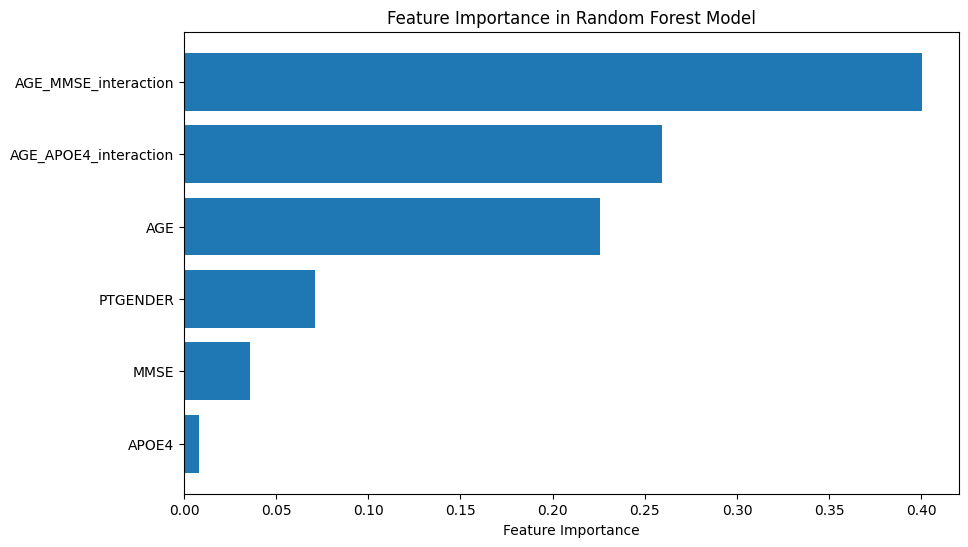


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimator

In [13]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset (adjust with the actual file path)
df = pd.read_csv("/kaggle/input/mri-scans-dataset/ADNIMERGE_03May2025.csv")

# Keep only subjects who were CN at baseline
df_cn = df[df['DX_bl'] == 'CN']

# Sort by subject (RID) and time (Years_bl)
df_cn = df_cn.sort_values(by=['RID', 'Years_bl'])

# Define a function to create duplicates for each subject
def create_duplicates(sub_df):
    rid = sub_df['RID'].iloc[0]
    age = sub_df['AGE'].iloc[0]
    gender = sub_df['PTGENDER'].iloc[0]
    duplicates = sub_df[['Years_bl', 'MMSE', 'APOE4', 'DX_bl', 'DX']].copy()
    duplicates['RID'] = rid
    duplicates['AGE'] = age
    duplicates['PTGENDER'] = gender
    return duplicates

# Apply the function to each subject (grouped by RID)
duplicated_df = df_cn.groupby('RID').apply(create_duplicates).reset_index(drop=True)

# Define a function to assign event status
def assign_event(sub_df):
    ad_visits = sub_df[sub_df['DX'] == 'AD']
    sub_df['event'] = 0
    if not ad_visits.empty:
        sub_df.loc[ad_visits.index[0], 'event'] = 1
    return sub_df

# Apply the event assignment function
duplicated_df = duplicated_df.groupby('RID').apply(assign_event).reset_index(drop=True)

# Encode categorical variables
duplicated_df['PTGENDER'] = duplicated_df['PTGENDER'].map({'Male': 0, 'Female': 1})
le = LabelEncoder()
duplicated_df['DX_bl'] = le.fit_transform(duplicated_df['DX_bl'])

# Create interaction terms
duplicated_df['AGE_MMSE_interaction'] = duplicated_df['AGE'] * duplicated_df['MMSE']
duplicated_df['AGE_APOE4_interaction'] = duplicated_df['AGE'] * duplicated_df['APOE4']

# Define features and target
features = ['AGE', 'PTGENDER', 'MMSE', 'APOE4', 'AGE_MMSE_interaction', 'AGE_APOE4_interaction']
target = 'Years_bl'

# Check for NaN values
print("NaN counts in features and target:")
print(duplicated_df[features + [target]].isna().sum())

# Drop rows with NaN values
duplicated_df = duplicated_df.dropna(subset=features + [target])

# Standardize MMSE and APOE4
scaler = StandardScaler()
duplicated_df[['MMSE', 'APOE4']] = scaler.fit_transform(duplicated_df[['MMSE', 'APOE4']])

# Recalculate interaction terms after scaling
duplicated_df['AGE_MMSE_interaction'] = duplicated_df['AGE'] * duplicated_df['MMSE']
duplicated_df['AGE_APOE4_interaction'] = duplicated_df['AGE'] * duplicated_df['APOE4']

# Prepare feature matrix and target
X = duplicated_df[features]
y = duplicated_df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters from GridSearch:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after Hyperparameter Tuning: {mse}')

# Train a separate Random Forest model for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (without GridSearch): {mse}')

# Print predicted times
print("Predicted Times (Years to AD):")
print(y_pred[:10])

# Compare predicted vs actual values
comparison_df = pd.DataFrame({'Actual Time': y_test, 'Predicted Time': y_pred})
print(comparison_df.head())

# Plot feature importance
importances = rf_model.feature_importances_
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.savefig('feature_importance.png')